In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [231]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(x,y) #inversed due to negative plot direction
    return(rho, phi)

In [232]:
def pol2cart(rho, phi):# since direction of plot is neg, these vals are reversed
    ydelta = rho * np.cos(phi)
    xdelta = rho * np.sin(phi)
    return(xdelta, ydelta)

In [233]:
### polar point : (r,theta) ###

def draw_vector_from_cart(p1,p2,ax,m,c,ls='--'):
    polar_p1 = cart2pol(p1[0],p1[1])
    polar_p2 = cart2pol(p2[0],p2[1])
    theta = np.array([polar_p1[1],polar_p2[1]])
    r = np.array([polar_p1[0],polar_p2[0]])
    ax.plot(theta,r,marker=m,color=c,linewidth=1,ls=ls)

In [234]:
def cart_for_next_point(p1,course,dist):
    
    delta_x = np.cos(np.deg2rad(90-course)) * dist 
    delta_y = np.sin(np.deg2rad(90-course)) * dist 
    
    new_x = p1[0] + delta_x
    new_y = p1[1] + delta_y

    return (new_x,new_y)


[(0, 0), (7.143772995026227e-18, 0.11666666666666667), (0.08660254037844389, 0.08333333333333334), (1.4898326807103918e-17, 0.05000000000000002), (-0.08660254037844387, 0.016666666666666687), (-0.08660254037844387, 0.13333333333333336), (1.4898326807103918e-17, 0.10000000000000003), (0.08660254037844389, 0.06666666666666671), (1.4898326807103918e-17, 0.03333333333333338), (2.2042099802130143e-17, 0.15000000000000005)]


<ipython-input-243-0cb47725a5ae>:57: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  _= ax.set_yticks(np.arange(0,max_ ),(max_/100))


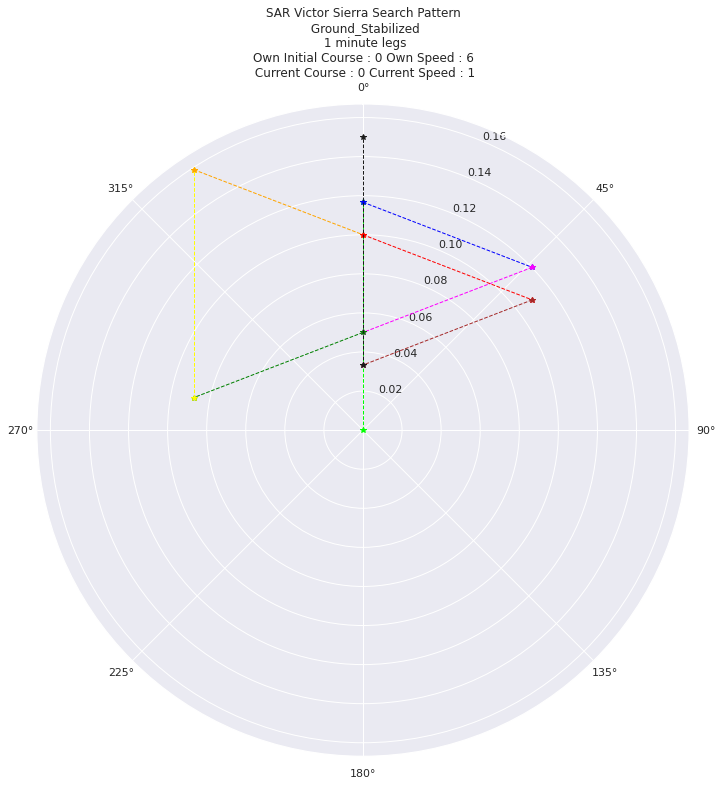

In [243]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ground_stabilized_leg_points = []
sea_stabilized_leg_points = []
courses = []

### PARAM ###
start_course = 0
own_speed = 6
own_vector = own_speed / 60 # one minute legs 
v_current = 1 # 
current_vector = v_current / 60
c_current = 0

mode = 'Ground_Stabilized' if v_current > 0 else 'Sea Stabilized'

ax.set_title('SAR Victor Sierra Search Pattern\n {}\n 1 minute legs\nOwn Initial Course : {} Own Speed : {}\n Current Course : {} Current Speed : {}'.format(
mode, start_course,own_speed,c_current,v_current))

next_p = start_p = (0,0)

ground_stabilized_leg_points.append(next_p)

courses.append(start_course)

for leg in range(9):
    next_p = cart_for_next_point(next_p,start_course,own_vector)
        
    if v_current != 0:
        next_p = cart_for_next_point(next_p,c_current,current_vector)
    
    ground_stabilized_leg_points.append(next_p)

    if (leg +1) % 3 != 0:
        start_course = (start_course + 120) % 360
    else:
        start_course = start_course
    
    courses.append(start_course)

print (ground_stabilized_leg_points)

xs_ground,ys_ground = list(zip(*ground_stabilized_leg_points))

colors = ['lime','blue','magenta','green','yellow',
         'orange','red','brown','k']

for i in range(len(xs_ground) - 1):
    draw_vector_from_cart((xs_ground[i],ys_ground[i]),(xs_ground[i+1],ys_ground[i+1]),ax,'*',colors[i]) 

max_x = max(xs_ground)
max_y = max(ys_ground)
max_ = max([max_x,max_y])
_= ax.set_yticks(np.arange(0,max_ ),(max_/100))

plt.savefig('SAR_victor_sierra_' + mode + '.jpg',format='jpg')